# EEB214: Understanding genetic drift through computer-based simulations in [`R`](https://www.r-project.org/)
This tutorial (i.e. Jupyter Notebook) will guide you through some hands-on example on how *Genetic Drift* operates within populations. Read and follow the instructions below. Enter the information requested and run each block of code separately. Some blocks of code will give you an output, such as text or a plot, other will not.

## Background
Imagine you have a population of a species of bacteria. Individuals (i.e. cells) in the population will have either the `A` or the `a` allele at a frequency set initially by you. The you will let the population reproduce and every generation you will select randomly which individuals pass on their genes. Now, all population genetic models have a set of (normally simplifying) assumptions. In our case, we will assume that the population size (total number of individuals at any given generation) will remain constant. That means that the initial number of individuals (population size) will be the same every generation. Also, remember that bacteria are [haploid](https://simple.wikipedia.org/wiki/Ploidy) (only one set of chromosomes) as opposed to humans being [diploid](https://simple.wikipedia.org/wiki/Ploidy) (two sets of chromosomes), meaning that every individual will only have one  of the alleles.

The way the simulation works is that every generation we'll randomly sample alleles. We'll keep on doing that until one allele get's "fixed" or goes "extinct" in the population. For tractability, we will only focus on the fate of allele `A`.

## Goals
* Run through the exersizes
* Try to understand what's happening in each step
* Use your results (text and plots) to answer the quiz on [Quercus](https://q.utoronto.ca/). How does changing the initial parameters of the simulation help you understand how *Genetic Drift* operates.

### Let's get started
First load the libraries and functions needed for the exersize.

In [77]:
# load libraries and functions
source('genetic_drift.R')

Now, let's set the initial parameters.

In [8]:
population_size = 10
initial_frequency = 0.5

These are [variables](https://en.wikipedia.org/wiki/Variable_(computer_science)) or placeholders. They are basically names that occupy a space in the memory of the computer and store a value.

We can recall these anytime.

In [9]:
# the print function prints to screen
print(population_size)
print(initial_frequency)

[1] 10
[1] 0.5


Now let's run our first simulation with these parameters.

In [10]:
simulation = genetic_drift(population_size, initial_frequency)
# first 6 rows of the table
head(simulation)
# last 6 rows of the table
tail(simulation)

,x,y,allele,generation,frequency
,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
1,-0.58974467,0.2013510,a,1,0.5
2,-0.01456684,-1.8149603,a,1,0.5
3,0.25206123,0.2147331,a,1,0.5
4,0.69264297,1.2623086,a,1,0.5
5,0.58249467,0.4804243,a,1,0.5
6,-0.87965522,1.2119942,A,1,0.5


,x,y,allele,generation,frequency
,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
145,0.37035906,0.75764498,A,14,0
146,-0.04288462,1.73899319,A,14,0
147,0.13542708,0.86750993,A,14,0
148,-0.05391141,-0.06201828,A,14,0
149,2.10817504,-0.27911062,A,14,0
150,-0.56189717,-0.62566139,A,14,0


Note that `x` and `y` are randomly generated coordinates (**don't worry about them! They are for plotting**). The last set of rows under `generation` are also telling at which generation the simulation stopped, as well as the frequency of allele `A`.

### Let's look at how our population of bacteria might look
We will plot the population at generation `1`. Imagine the dark circle is our [Petri dish](https://en.wikipedia.org/wiki/Petri_dish) and the colored dots are our colonies with either the `A` or the `a` allele. Since our `initial_frequency` is set to `0.5`, this means that bacteria with `A` or with `a` will be at equal numbers at generation 1.

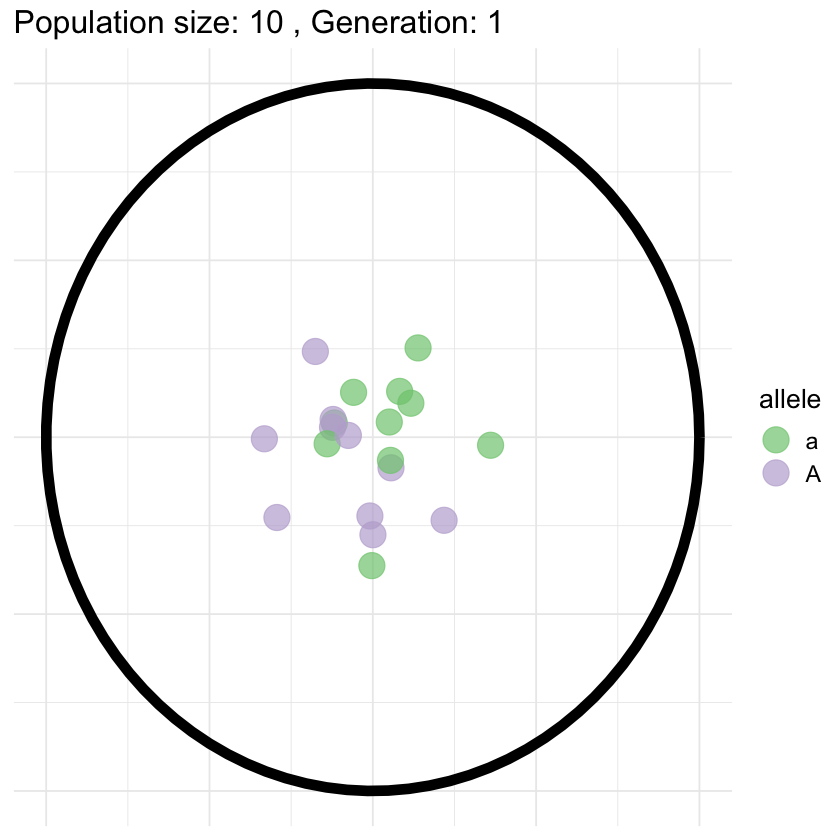

In [28]:
p1 = plot_population(simulation, 1, population_size)
p1

Now let's look at the last generation.

In [29]:
last_generation = simulation[nrow(simulation),"generation"]
# print(last_generation)
p_last = plot_population(simulation, last_generation, population_size)

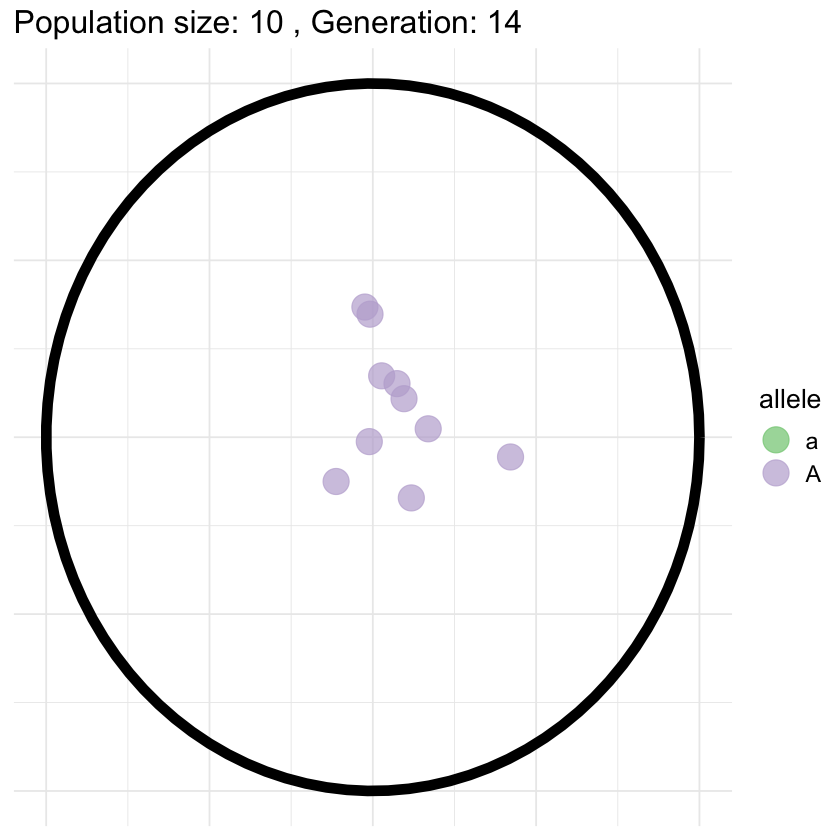

In [30]:
p_last

**What happend here? Where did the other allele go?**

### Plot the frequecy of allele `A` through time
Now let's look at the frequency of allele `A`. 

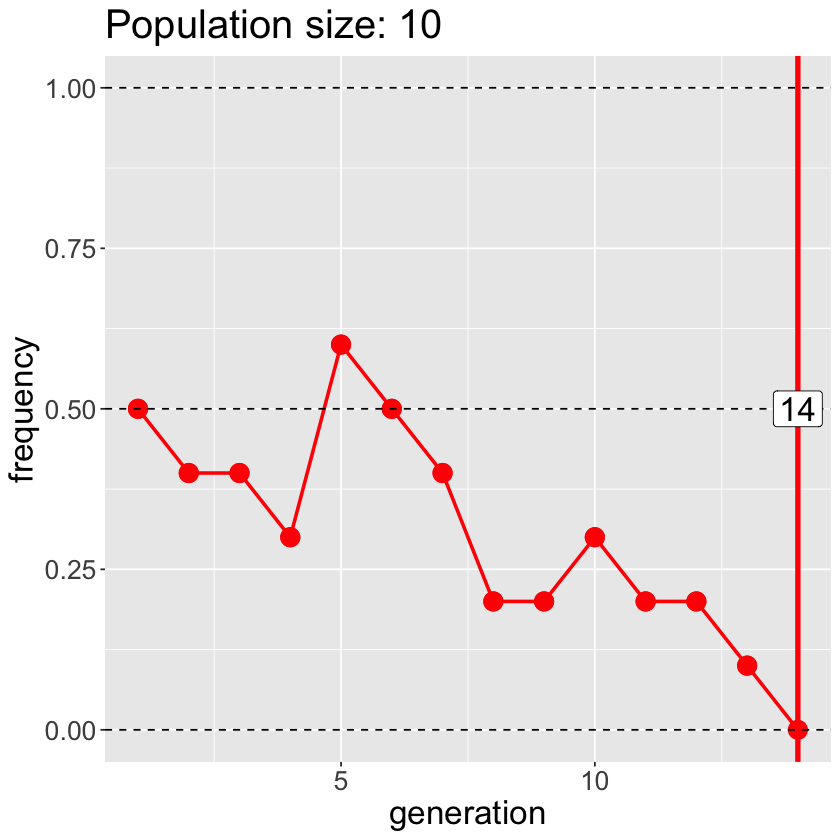

In [40]:
p_freq = plot_frequency(simulation, population_size)
p_freq

What is the frequency of allele `A` at the last generation? Did it fixed or did go extinct? How many generations did it take?

### Play with the parameters: population size
Now let's see what happens if we changes the parameters a bit.

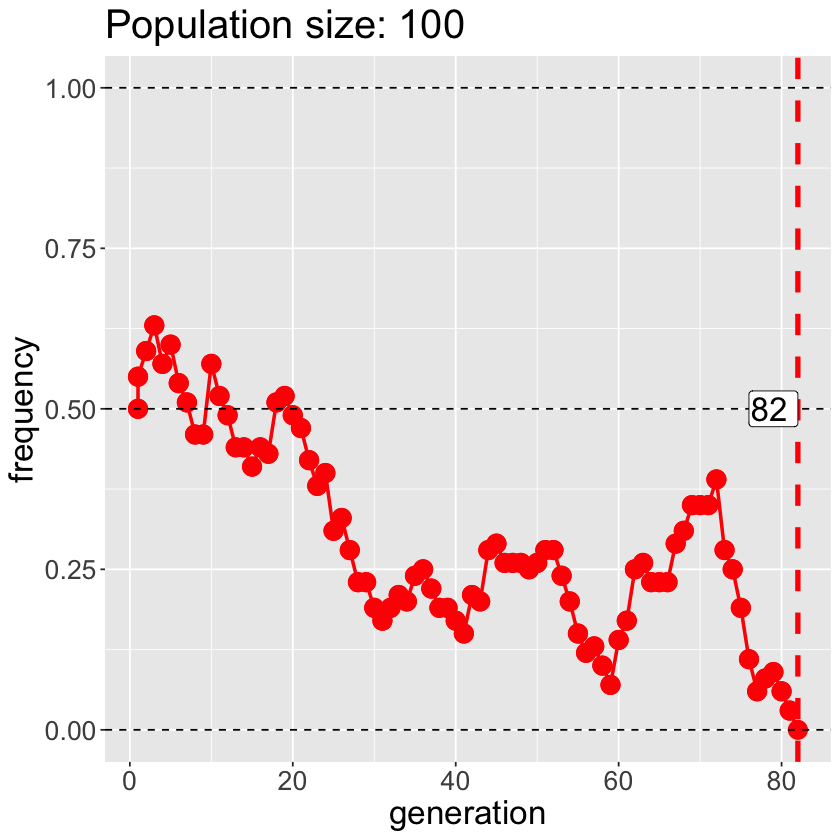

In [78]:
population_size = 100
simulation = genetic_drift(population_size, initial_frequency)
plot_frequency(simulation, population_size)

**What happened now? What changed?**

Let's try repeating these two population sizes multiple times, then average the results.

In [79]:
# for storing plots
plots = vector("list",12)
# for the last generation in each simulation
last_gens = vector("numeric",12)
last_freq = vector("numeric",12)
# vector of population sizes
popsize = 10
# loop through and save plot
for (i in 1:12){
    simulation = genetic_drift(popsize, initial_frequency)
    last_gens[i] = simulation[nrow(simulation),"generation"]
    last_freq[i] = simulation[nrow(simulation),"frequency"]
    plots[[i]] = plot_frequency(simulation, popsize)
}
# this might take a while... Be patient!

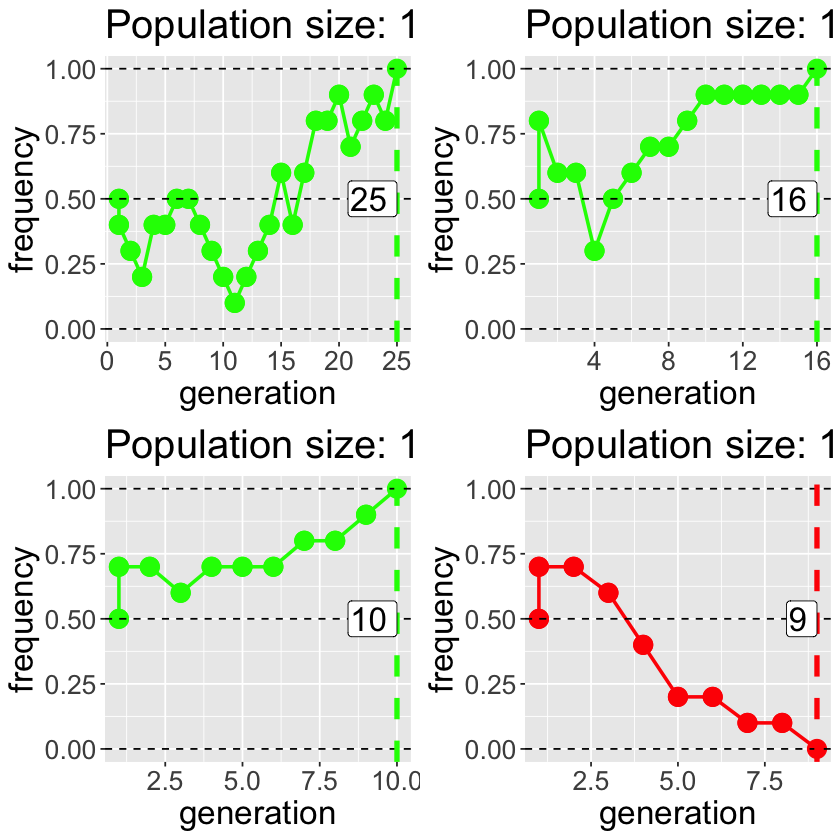

In [80]:
# first 4
do.call(plot_grid, c(plots[1:4], ncol=2))

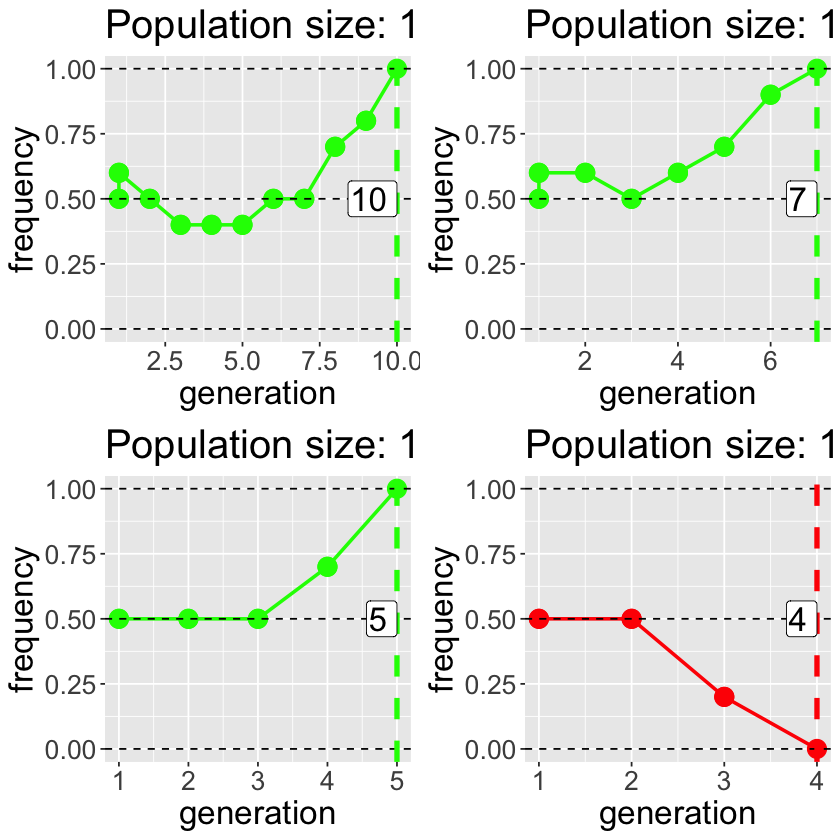

In [81]:
# next 4
do.call(plot_grid, c(plots[5:8], ncol=2))

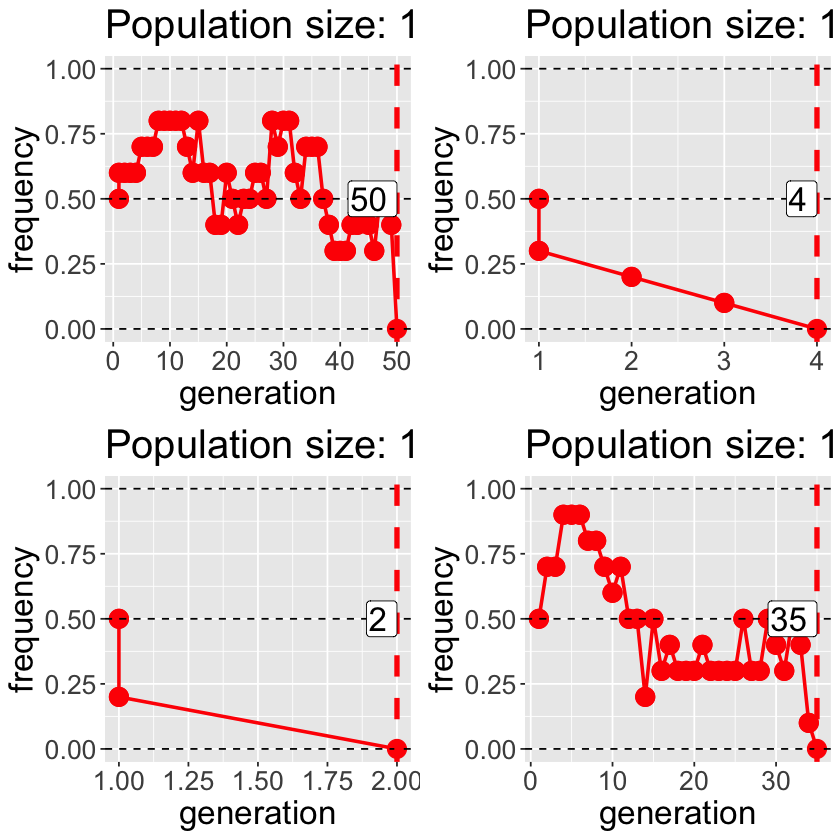

In [82]:
# next 4
do.call(plot_grid, c(plots[9:12], ncol=2))

**What do the** <span style="color:red">red</span> **and** <span style="color:green">green</span> **colors stand for? Can you note any patterns?**

For a population size of 10 let's look at the averge time it takes an allele to get fixed.

In [83]:
print(mean(last_gens))

[1] 14.75


Now let's look at the number of times the allele got fixed or got lost.

In [84]:
tab = table(last_freq)
names(tab) = c("lost","fixed")
tab

 lost fixed 
    6     6 

Based on these numbers we can calculate the probability an allele will get fixed as a function of it's initial frequency and a assuming a random sampling process (*Genetic Drift*).

In [85]:
tab/sum(tab)

 lost fixed 
  0.5   0.5 

Let's try increasing the population size.

In [86]:
# for storing plots
plots = vector("list",12)
# for the last generation in each simulation
last_gens = vector("numeric",12)
last_freq = vector("numeric",12)
# vector of population sizes
popsize = 100
# loop through and save plot
for (i in 1:12){
    simulation = genetic_drift(popsize, initial_frequency)
    last_gens[i] = simulation[nrow(simulation),"generation"]
    last_freq[i] = simulation[nrow(simulation),"frequency"]
    plots[[i]] = plot_frequency(simulation, popsize)
}
# this might take a while... Be patient!

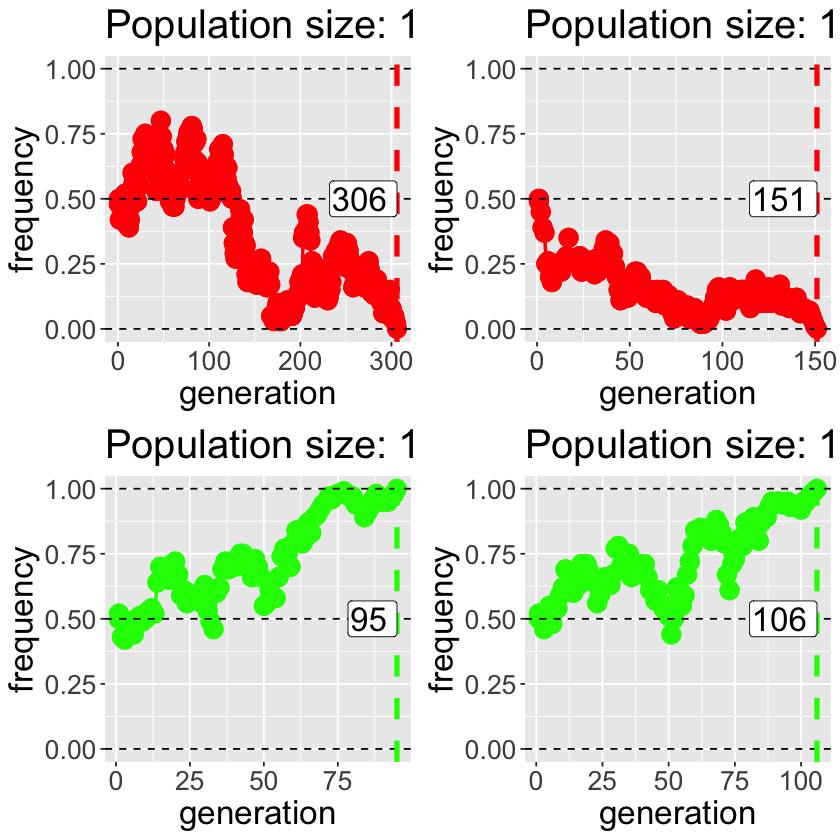

In [87]:
# first 4
do.call(plot_grid, c(plots[1:4], ncol=2))

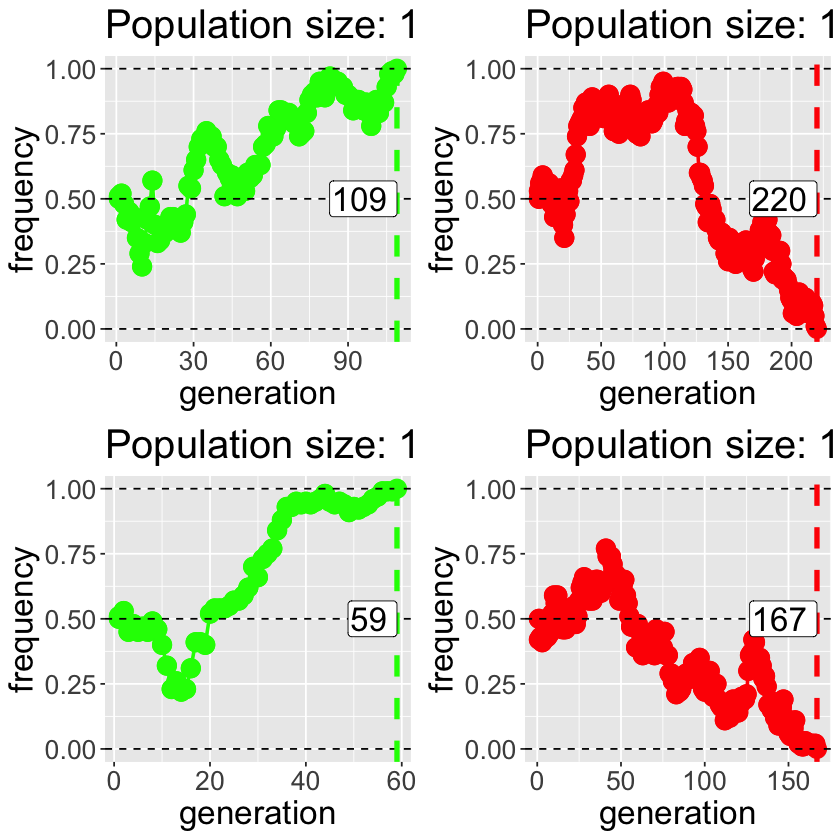

In [88]:
# next 4
do.call(plot_grid, c(plots[5:8], ncol=2))

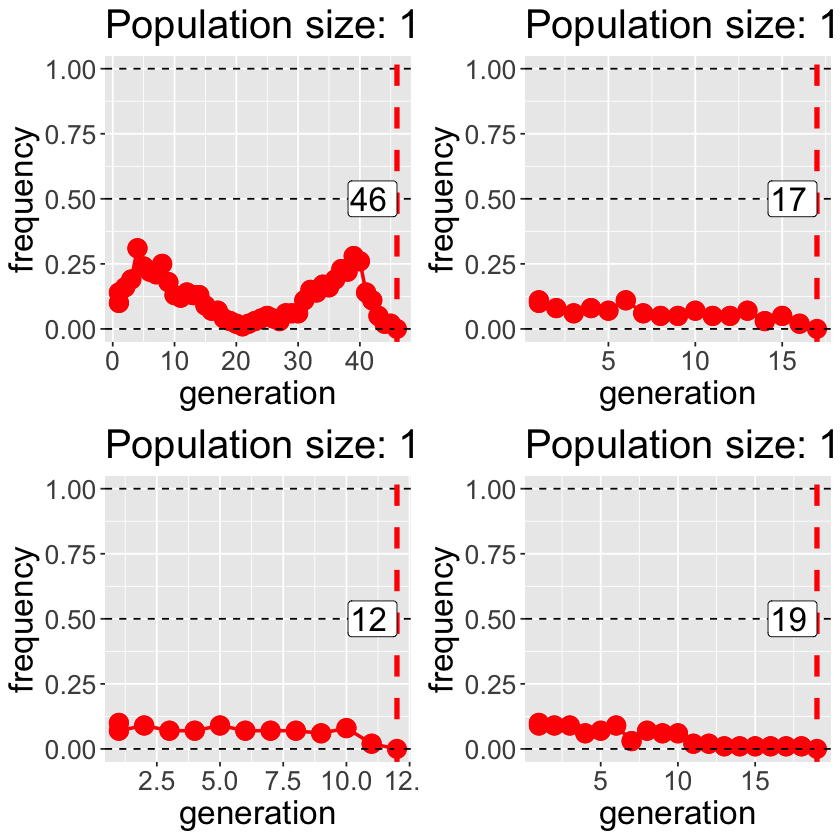

In [102]:
# next 4
do.call(plot_grid, c(plots[9:12], ncol=2))

Let's look at the average number of generation.

In [90]:
print(mean(last_gens))

[1] 135.0833


**Compare this result with the previous one (i.e. population size = 10). What's different?**

Let's now look at times it fixed/went extinct and the probability of fixation.

In [92]:
tab = table(last_freq)
names(tab) = c("lost","fixed")
tab
# probability
tab/sum(tab)

 lost fixed 
    6     6 

 lost fixed 
  0.5   0.5 

**Compare the probability of fixation with the initial frequency. Is there a relationship?**

### Play with the parameters: initial frequency
Now let's see what happens if we changes the initial frequency a bit.

Let's run the same simulation, but this time let's start with a frequency of `0.1`.

In [93]:
# for storing plots
plots = vector("list",12)
# for the last generation in each simulation
last_gens = vector("numeric",12)
last_freq = vector("numeric",12)
# vector of population sizes
initfreq = 0.1
popsize = 100
# loop through and save plot
for (i in 1:12){
    simulation = genetic_drift(popsize, initfreq)
    last_gens[i] = simulation[nrow(simulation),"generation"]
    last_freq[i] = simulation[nrow(simulation),"frequency"]
    plots[[i]] = plot_frequency(simulation, popsize)
}
# this might take a while... Be patient!

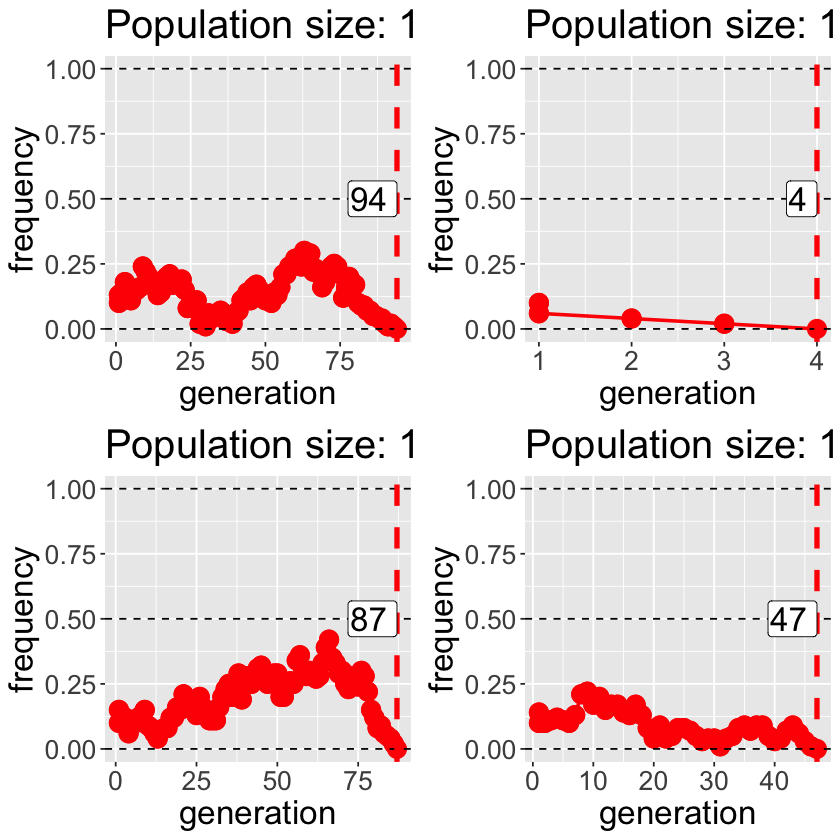

In [94]:
# first 4
do.call(plot_grid, c(plots[1:4], ncol=2))

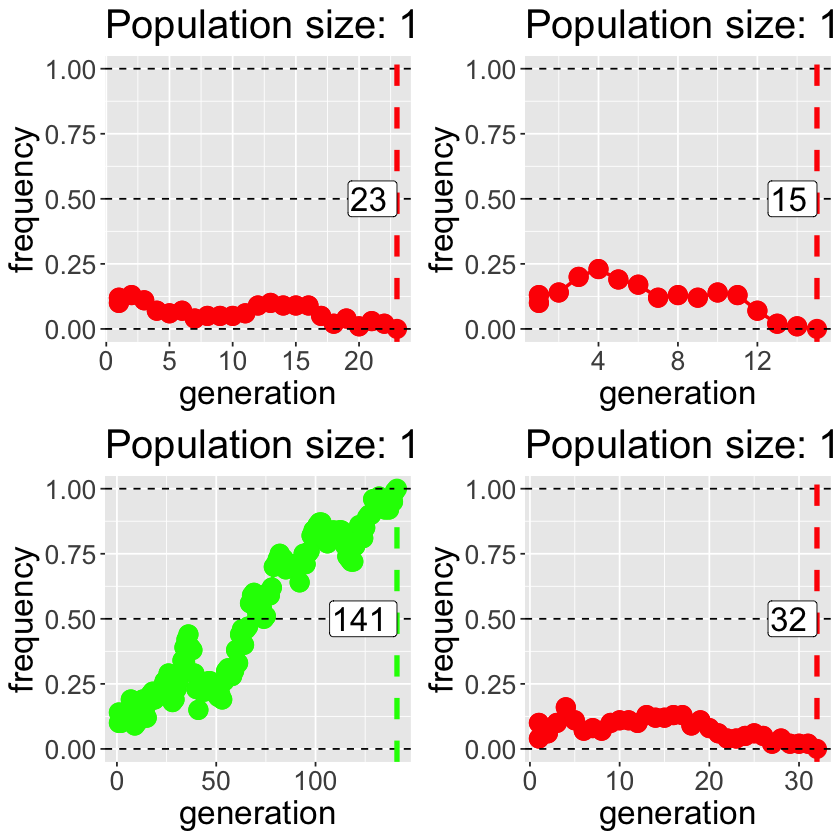

In [95]:
# next 4
do.call(plot_grid, c(plots[5:8], ncol=2))

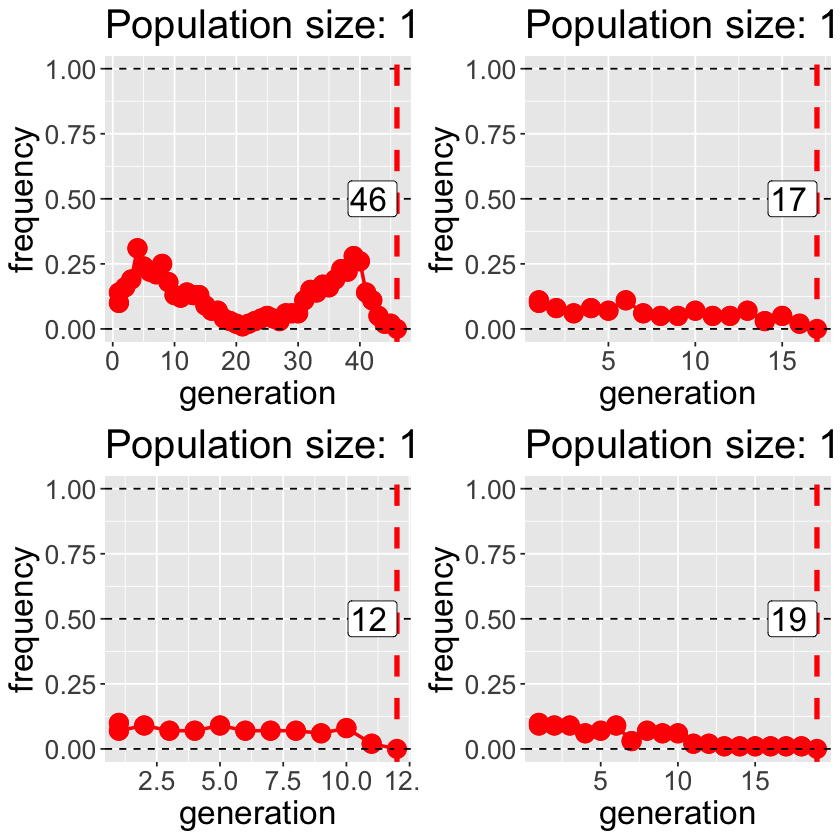

In [96]:
# next 4
do.call(plot_grid, c(plots[9:12], ncol=2))

**Is there a pattern?**

Let's look at the average time to fixation or loss.

In [97]:
print(mean(last_gens))

[1] 44.75


**If it's the same population size (population_size = 100), why is the time shorter?**

Let's now look at times it fixed/went extinct and the probability of fixation.

In [98]:
tab = table(last_freq)
names(tab) = c("lost","fixed")
tab
# probability
tab/sum(tab)

 lost fixed 
   11     1 

      lost      fixed 
0.91666667 0.08333333 

Let's round those numbers to their nearest decimal.

In [99]:
round(tab/sum(tab),1)

 lost fixed 
  0.9   0.1 

__What is the relationship between the probability of fixation of an allele and it's initial frequency?__